# Introducción

El objetivo del siguiente cuadernillo es analizar la correlacción de cada una de las variables de la base de datos *CONSOLIDADO_CLIMA_2012-2020*, para determinar que variables presentan mayor importancia en las variables Sacarosa, Sacarosa Porcentaje y Sacarosa Campo.

# Librerias

In [1]:
import pandas as pd
import numpy as np

## Instalando Pycaret

In [2]:
!pip install Jinja2 

In [3]:
#!pip install scikit-learn==0.23.2

In [4]:
from pycaret.regression import *

# Importación de los datos y división de las variables

In [5]:
df1 = pd.read_excel('Consolidado_2012-2020 - Variables Autocorrelacionadas eliminadas.xlsx')

In [6]:
rsd=df1.copy()
rsd = rsd.drop(['lttud_nrte','lngtud_oeste','ESTACION'],axis=1).copy()

len(rsd.columns)

69

In [7]:
rsd.keys()

Index(['SUERTE_SA', 'MES', 'Z_AGROEC', 'FECHA_CORTE', 'tmp_mnma', 'tmp_mdia',
       'tmp_mxma', 'hmd_rel_mnma', 'hmd_rel_mdia', 'hmd_rel_mxma',
       'rdcion_slar', 'prcptcion', 'brllo_slar', 'evp_clclada',
       'dir_vnto_mdio', 'vel_vnto_mdio', 'var_vnto_mdio', 'dir_vnto_mxmo',
       'vel_vnto_mxmo', 'tmprda', 'nm_cndcion', 'ds_lluvia', 'Grados_dias',
       'VAR', 'Edad', 'TCH', 'Sac', 'Pza', 'Rendt', 'Con_Sin_Mad', 'PRODUCTO',
       'SEM_mad', 'TIPO_COS', 'SacCampo', 'prof', 'ph', 'phext', 'ce', 'mo',
       'pbrayii', 'polsen', 'ca', 'mg', 'k', 'na', 'camg', 'cic', 'al3h',
       'al3', 's', 'b', 'cu', 'fe', 'mn', 'zn', 'arena', 'limo', 'arcilla',
       'textura', 'id_textura', 'aniones', 'p_total', 'mg_sacarosa',
       'p_solucion', 'p_disponible', 'volumen_naoh', 'cice', 'sat_k', 'k_kg'],
      dtype='object')

In [8]:
#'p_solucion', 'p_disponible', 'volumen_naoh', 'cice', 'sat_k', 'k_kg'

In [9]:
rsd.head()

,SUERTE_SA,MES,Z_AGROEC,FECHA_CORTE,tmp_mnma,tmp_mdia,tmp_mxma,hmd_rel_mnma,hmd_rel_mdia,hmd_rel_mxma,rdcion_slar,prcptcion,brllo_slar,evp_clclada,dir_vnto_mdio,vel_vnto_mdio,var_vnto_mdio,dir_vnto_mxmo,vel_vnto_mxmo,tmprda,nm_cndcion,ds_lluvia,Grados_dias,VAR,Edad,TCH,Sac,Pza,Rendt,Con_Sin_Mad,PRODUCTO,SEM_mad,TIPO_COS,SacCampo,prof,ph,phext,ce,mo,pbrayii,polsen,ca,mg,k,na,camg,cic,al3h,al3,s,b,cu,fe,mn,zn,arena,limo,arcilla,textura,id_textura,aniones,p_total,mg_sacarosa,p_solucion,p_disponible,volumen_naoh,cice,sat_k,k_kg
0,1101-030,1,6H1,2012-01-12,18.193548,22.025806,28.700000,51.870968,85.548387,100.000000,286.032258,99.3,0.000000,3.225806,ESE,1.3,82.0,WNW,5.5,1ra. Seca,Niña,20.0,-14.746774,CC 85-92,12.4,107.033,14.992,86.658,9.766,Con Mad,Roundup 747 + Cosmomadurador,2.0,MECANICO,14.4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1101-041,1,7H1,2012-01-12,18.193548,22.025806,28.700000,51.870968,85.548387,100.000000,286.032258,99.3,0.000000,3.225806,ESE,1.3,82.0,WNW,5.5,1ra. Seca,Niña,20.0,-14.746774,CC 85-92,15.6,103.265,16.734,94.139,12.491,Con Mad,Roundup 747 + Cosmomadurador,2.0,MECANICO,15.2472,NaN,6.84,0.0,0.0,2.020115,17.744,0.0,18.12255,9.0709,0.5224,0.0,2.012051,0.0,0.0,0.0,0.0,0.0,1.3765,18.35055,68.23375,0.90955,32.8,26.64,40.56,NaN,2.0,0.0,0.0,13.941442,0.967,17.744,0.0,27.71585,0.019001,81.830645
2,1107-050,1,5H3,2012-01-19,18.258065,22.283871,28.990323,50.903226,81.903226,99.774194,426.387097,52.1,2.177419,5.222581,WSW,2.2,74.0,WNW,5.9,1ra. Seca,Niña,15.0,-14.633871,CC 85-92,13.0,90.062,16.408,91.881,12.107,Sin Mad,NaN,NaN,MANUAL,14.6148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1107-070,1,6H1,2012-01-19,18.193548,22.025806,28.700000,51.870968,85.548387,100.000000,286.032258,99.3,0.000000,3.225806,ESE,1.3,82.0,WNW,5.5,1ra. Seca,Niña,20.0,-14.746774,CC 85-92,12.9,79.434,16.449,93.201,12.223,Sin Mad,NaN,NaN,MANUAL,15.3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1107-090,1,6H1,2012-01-19,18.193548,22.025806,28.700000,51.870968,85.548387,100.000000,286.032258,99.3,0.000000,3.225806,ESE,1.3,82.0,WNW,5.5,1ra. Seca,Niña,20.0,-14.746774,CC 85-92,12.9,86.374,15.613,92.421,11.552,Sin Mad,NaN,NaN,MANUAL,15.4611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#rsd['ESTACION']

In [11]:
numeric= ['MES','tmp_mnma','tmp_mdia','tmp_mxma','hmd_rel_mnma',
          'hmd_rel_mdia','hmd_rel_mxma','rdcion_slar','prcptcion','brllo_slar',
          'evp_clclada','vel_vnto_mdio','var_vnto_mdio','vel_vnto_mxmo',
          'ds_lluvia','Grados_dias','Edad','TCH','Pza',
          'Rendt','SEM_mad',
          'prof','ph','phext','ce','mo',
          'pbrayii','polsen','ca','mg','k','na','camg','cic','al3h','al3','s','b',
          'cu','fe','mn','zn','arena','limo','arcilla','textura','id_textura','aniones',
          'p_total','mg_sacarosa','p_solucion','p_disponible',
          'volumen_naoh','cice','sat_k',
          'k_kg']#'Sac','Sac Campo','Sac % Caña','rteorico',,'nt','nd','nd_kg'

#ESTACION_ZAR

categories =  ['Z_AGROEC','dir_vnto_mdio','dir_vnto_mxmo',
               'tmprda','nm_cndcion','Con_Sin_Mad','PRODUCTO','MES',
               'TIPO_COS']#ESTACION

cardinal_data = ['SUERTE_SA','VAR']
dates = ['FECHA_CORTE']

# Creación de la base de datos

In [12]:
# Sac
dataset = rsd.copy()
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (14508, 69)
Unseen Data For Predictions: (764, 69)


# Implementación de los modelos

## Análisis de la variable Sacarosa

### Selección del mejor modelo

In [13]:
exp_clf101 = setup(data = data, target = "Sac", session_id=123,
                   numeric_features=numeric,categorical_features=categories,
                   high_cardinality_features=cardinal_data, date_features=dates) 

,Description,Value
0,session_id,123
1,Target,Sac
2,Original Data,"(14508, 69)"
3,Missing Values,True
4,Numeric Features,57
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(10155, 207)"


In [14]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1763,0.1015,0.3173,0.9285,0.0185,0.0109,1.9790
lightgbm,Light Gradient Boosting Machine,0.2003,0.1091,0.3292,0.9231,0.0191,0.0124,0.1270
rf,Random Forest Regressor,0.2014,0.1189,0.3438,0.9162,0.0200,0.0125,2.1560
gbr,Gradient Boosting Regressor,0.3121,0.1918,0.4374,0.8647,0.0254,0.0193,0.7810
dt,Decision Tree Regressor,0.2853,0.2359,0.4848,0.8337,0.0281,0.0176,0.0500
br,Bayesian Ridge,0.4175,0.3017,0.5489,0.7873,0.0320,0.0258,0.0660
ridge,Ridge Regression,0.4175,0.3020,0.5491,0.7870,0.0320,0.0258,0.0160
lr,Linear Regression,0.4181,0.3028,0.5499,0.7865,0.0320,0.0258,0.1970
omp,Orthogonal Matching Pursuit,0.4677,0.3645,0.6033,0.7429,0.0353,0.0290,0.0160
ada,AdaBoost Regressor,0.5899,0.5267,0.7255,0.6283,0.0428,0.0369,0.5940


In [15]:
best_model

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

### Implementación del mejor modelo

In [16]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1772,0.0994,0.3154,0.9299,0.0184,0.0110
1,0.1789,0.1079,0.3285,0.9256,0.0190,0.0111
2,0.1865,0.1089,0.3299,0.9252,0.0193,0.0116
3,0.1673,0.0873,0.2955,0.9433,0.0172,0.0104
4,0.1717,0.1032,0.3212,0.9240,0.0187,0.0106
5,0.1984,0.1489,0.3859,0.8985,0.0227,0.0124
6,0.1715,0.1007,0.3173,0.9243,0.0183,0.0106
7,0.1814,0.0981,0.3132,0.9280,0.0183,0.0112
8,0.1711,0.0839,0.2897,0.9426,0.0169,0.0106


In [19]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6951,0.8007,0.8948,0.4357,0.0532,0.0438
1,0.6926,0.8105,0.9003,0.4412,0.0532,0.0435
2,0.7054,0.8346,0.9136,0.4263,0.0538,0.0440
3,0.7131,0.8303,0.9112,0.4608,0.0537,0.0444
4,0.6730,0.7503,0.8662,0.4474,0.0512,0.0421
5,0.7055,0.8393,0.9161,0.4277,0.0541,0.0442
6,0.6523,0.7418,0.8613,0.4424,0.0507,0.0406
7,0.6744,0.7492,0.8656,0.4497,0.0510,0.0421
8,0.6921,0.7906,0.8892,0.4588,0.0527,0.0435


### Graficas del modelo

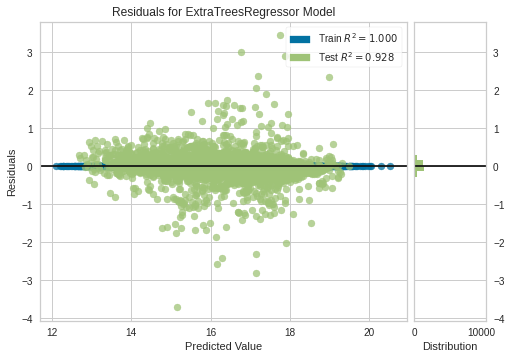

In [20]:
plot_model(et)

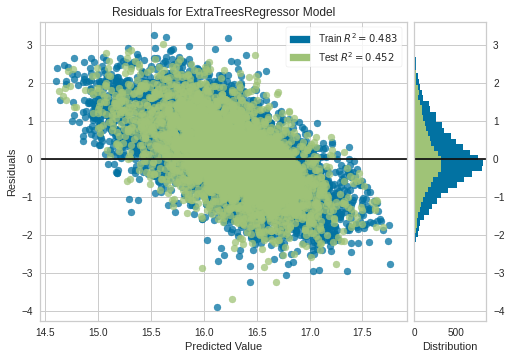

In [21]:
plot_model(tuned_et)

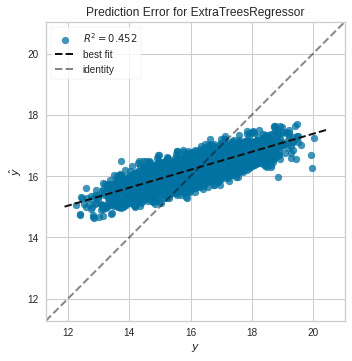

In [22]:
plot_model(tuned_et, plot = 'error')

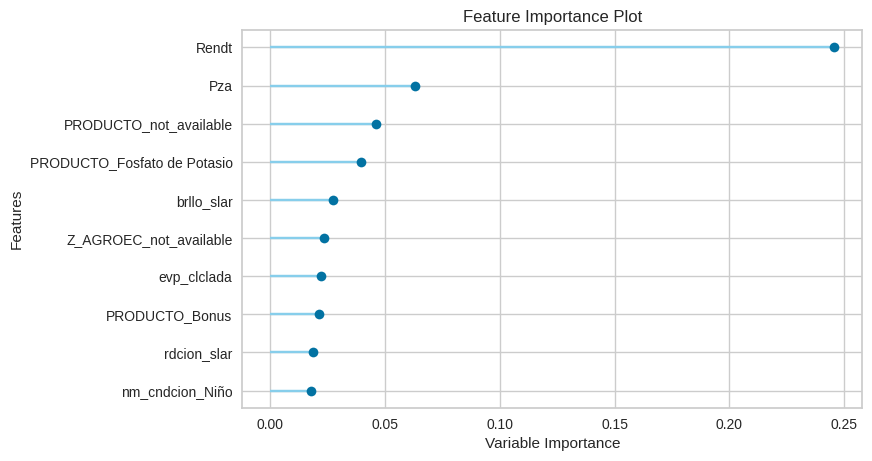

In [23]:
plot_model(tuned_et, plot='feature')

In [24]:
predict_model(tuned_et) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6759,0.7601,0.8718,0.4520,0.0516,0.0425


,SUERTE_SA,MES,tmp_mnma,tmp_mdia,tmp_mxma,hmd_rel_mnma,hmd_rel_mdia,hmd_rel_mxma,rdcion_slar,prcptcion,...,FECHA_CORTE_weekday_1,FECHA_CORTE_weekday_2,FECHA_CORTE_weekday_3,FECHA_CORTE_weekday_4,FECHA_CORTE_weekday_5,FECHA_CORTE_weekday_6,FECHA_CORTE_is_month_end_1,FECHA_CORTE_is_month_start_0,Sac,Label
0,2.0,2.0,19.307142,23.950001,31.375000,43.785713,76.178574,96.928574,400.889282,48.900002,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.912000,16.308938
1,1.0,7.0,18.590322,24.319355,32.229031,40.161289,74.838707,97.451614,440.816132,27.100000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.243999,16.137588
2,3.0,3.0,19.367743,24.303226,31.980644,44.000000,77.322578,98.741936,454.087097,129.399994,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,16.871000,16.352370
3,3.0,5.0,19.783871,23.654839,30.409678,53.000000,84.322578,99.483871,407.232269,196.800003,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,17.698000,16.448017
4,2.0,12.0,17.770967,23.293549,31.645161,44.193550,78.903229,99.806450,454.193542,21.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.827999,16.802507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2.0,8.0,17.935484,23.487097,31.645161,36.166668,71.419357,93.419357,393.258057,39.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.055000,16.409397
4349,5.0,11.0,19.783333,24.030001,30.658621,50.200001,81.133331,98.966667,407.623322,70.099998,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,16.229000,15.977060
4350,3.0,9.0,18.216667,23.216667,31.639999,42.700001,80.099998,99.900002,422.070007,94.400002,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,18.584000,16.717787
4351,2.0,7.0,19.603226,24.367743,31.416128,50.322582,81.290321,99.741936,516.719360,81.400002,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.458000,15.239908


In [ ]:
#!pip install shap
#interpret_model(et)

## Análisis de la variable Sacarosa Campo

In [25]:
exp_clf101 = setup(data = data, target = "SacCampo", session_id=123,
                   numeric_features=numeric,categorical_features=categories,
                   high_cardinality_features=cardinal_data, date_features=dates) 

,Description,Value
0,session_id,123
1,Target,SacCampo
2,Original Data,"(14508, 69)"
3,Missing Values,True
4,Numeric Features,57
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(10155, 207)"


In [26]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4334,0.3709,0.6085,0.4616,0.0395,0.0299,2.0910
rf,Random Forest Regressor,0.4492,0.3881,0.6224,0.4371,0.0405,0.0310,2.2870
lightgbm,Light Gradient Boosting Machine,0.4551,0.3889,0.6229,0.4362,0.0404,0.0313,0.1210
gbr,Gradient Boosting Regressor,0.4840,0.4311,0.6558,0.3752,0.0426,0.0333,0.7640
br,Bayesian Ridge,0.5146,0.4789,0.6911,0.3063,0.0448,0.0354,0.0670
ridge,Ridge Regression,0.5160,0.4808,0.6924,0.3035,0.0449,0.0355,0.0150
lr,Linear Regression,0.5169,0.4823,0.6935,0.3013,0.0449,0.0356,0.0220
omp,Orthogonal Matching Pursuit,0.5225,0.4938,0.7019,0.2843,0.0454,0.0360,0.0160
ada,AdaBoost Regressor,0.5562,0.5360,0.7315,0.2222,0.0472,0.0381,0.5450
knn,K Neighbors Regressor,0.5908,0.6085,0.7793,0.1170,0.0504,0.0407,0.0760


In [27]:
best_model

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

### Implementación del mejor modelo

In [34]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4171,0.3429,0.5856,0.4604,0.0381,0.0289
1,0.4233,0.3447,0.5871,0.5063,0.0384,0.0293
2,0.4275,0.3560,0.5966,0.4238,0.0385,0.0293
3,0.4465,0.4204,0.6484,0.4406,0.0424,0.0308
4,0.4290,0.3460,0.5882,0.4754,0.0376,0.0292
5,0.4291,0.3631,0.6026,0.4740,0.0391,0.0295
6,0.4276,0.3469,0.5890,0.4776,0.0378,0.0292
7,0.4630,0.4438,0.6662,0.4504,0.0447,0.0326
8,0.4431,0.3746,0.6121,0.4522,0.0394,0.0303


In [35]:
tuned_lightgbm = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4876,0.4224,0.6499,0.3353,0.0423,0.0338
1,0.5191,0.4711,0.6863,0.3253,0.0449,0.0359
2,0.4780,0.3962,0.6295,0.3587,0.0406,0.0327
3,0.5203,0.5235,0.7236,0.3033,0.0472,0.0359
4,0.5062,0.4332,0.6582,0.3431,0.0422,0.0346
5,0.5083,0.4627,0.6803,0.3297,0.0441,0.0350
6,0.5002,0.4456,0.6675,0.3291,0.0428,0.0342
7,0.5465,0.5645,0.7513,0.3010,0.0502,0.0384
8,0.5120,0.4688,0.6847,0.3145,0.0440,0.0350


### Graficas del modelo

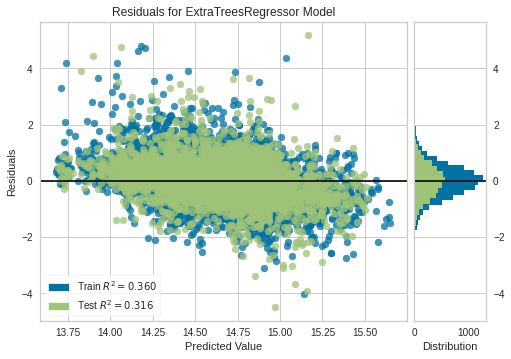

In [36]:
plot_model(tuned_lightgbm)

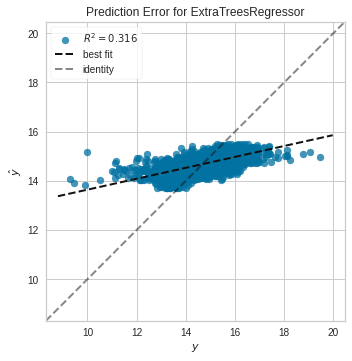

In [37]:
plot_model(tuned_lightgbm, plot = 'error')

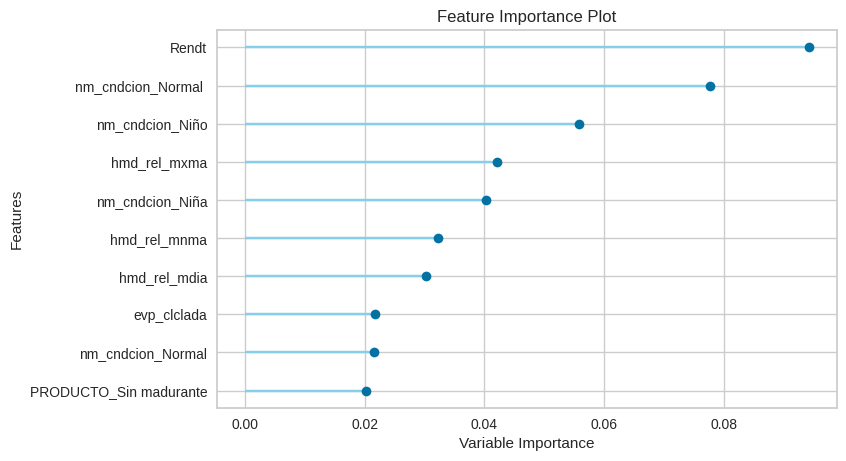

In [38]:
plot_model(tuned_lightgbm, plot='feature')

In [39]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5242,0.5069,0.7119,0.3155,0.0462,0.0362


## Análisis de la variable Sac % Caña

**Nota:** Estos códigos no estan actualizados, en la nueva base de datos se eliminó 

In [ ]:
exp_clf101 = setup(data = data, target = "Sac % Caña", session_id=123,
                   numeric_features=numeric,categorical_features=categories,
                   high_cardinality_features=cardinal_data, date_features=dates) 

In [ ]:
best_model=compare_models()

In [ ]:
best_model

### Implementación del mejor modelo

In [ ]:
lightgbm = create_model('lightgbm')

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

### Graficas del modelo

In [ ]:
plot_model(tuned_lightgbm)

In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
predict_model(tuned_lightgbm);

# **REFERENCIAS**

- https://pycaret.gitbook.io/docs/get-started/tutorials (Tutorials - Official tutorials created by the developers of PyCaret)

- https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d (Introduction to Binary Classification with PyCaret)
- https://www.kaggle.com/code/frtgnn/pycaret-introduction-classification-regression/notebook (PyCaret Introduction (Classification & Regression))
- https://www.youtube.com/watch?v=D_4uqfzl0Q8&ab_channel=StatsWire (PyCaret Tutorial 03: Regression Module and Setting Up Environment)
- https://www.youtube.com/watch?v=WQAKswAS7Fs&list=PLBSCvBlTOLa8hscJePfnXiFup62VcQpDZ&ab_channel=StatsWire (PyCaret Tutorial for beginners)
- https://www.tensorflow.org/probability/examples/Linear_Mixed_Effects_Model_Variational_Inference (Ajuste de modelos lineales de efectos mixtos generalizados mediante inferencia variacional)
